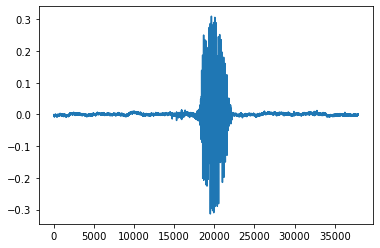

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import scipy
import torchaudio
import torch


def conv1d(sequence, kernel):
    output = []
    length = len(sequence + 1)
    sequence = np.pad(sequence, (0, kernel.size), 'constant', constant_values=0)
    for i in range(length):
        conv = [np.dot(sequence[i:i + kernel.size], kernel)]
        output.append(conv)
    output = np.array(output)

    return output

def trapezoidal(input_wav, save_wav,j):

    first_wav = []
    last_wav = []
    for i, ratio in enumerate(np.arange(0.1,1,0.2)):
        if i <3:
            filter_length = 10
        else:
            filter_length = 9
        filter = scipy.signal.firwin(filter_length, ratio, window='hamming')
        first_wav.append(np.convolve(input_wav[i*filter_length:i*filter_length+filter_length], filter,"same"))
        last_wav.append(np.convolve(input_wav[-(i*filter_length+filter_length+1):-(i*filter_length+1)], filter,"same"))

    first_wav = np.concatenate(first_wav)
    last_wav = np.concatenate(last_wav)

    if j==0:
        first_wav = np.array(first_wav)
    else:
        first_wav = (np.array(first_wav) + np.array(save_wav))/2
    second_wav = input_wav[trapezoidal_length : output_length]

    return np.concatenate((first_wav, second_wav)), last_wav



wav, sr = librosa.load('./kdigits0-3.wav', sr=16000)
load_length = sr//1000*13
trapezoidal_length = sr//1000*3
output_length = sr//1000*10
last_wav = None
trapezoided_wav = []

for i in np.arange(len(wav)//output_length):
    if i < len(wav)//output_length:
        intput_wav = wav[i*output_length : i*output_length+load_length]
        output_wav, last_wav = trapezoidal(intput_wav, last_wav, i)
        trapezoided_wav = np.concatenate((trapezoided_wav, output_wav))


trapezoided_wav = np.array(trapezoided_wav)

torchaudio.save('./trapezoided.wav', torch.tensor(trapezoided_wav).T, 16000)

plt.figure()
plt.plot(trapezoided_wav)
plt.show()